In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import datetime as dt
from pandas.plotting import table
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

In [98]:
data=pd.read_csv('Admission_Predict_Ver1.1.csv')
data=data.drop(columns=['Serial No.'])
data.head(2)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76


In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [100]:
data.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


In [101]:
def plot_hist(variable):
    plt.figure(figsize =(9,3))
    plt.hist(data[variable], bins =50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

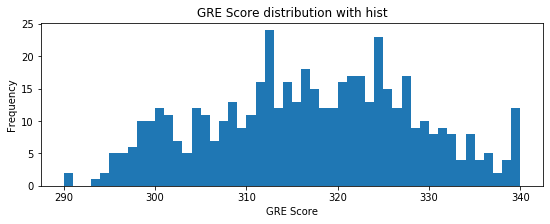

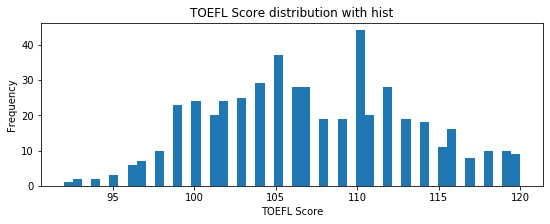

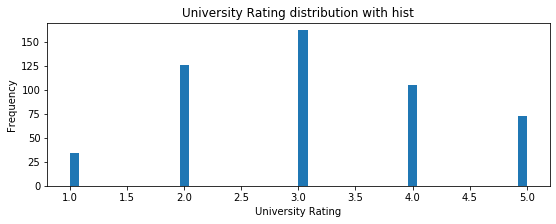

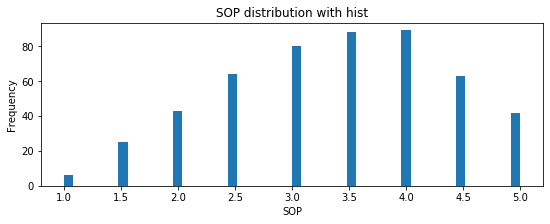

In [102]:
numericVar = ["GRE Score", "TOEFL Score", "University Rating","SOP"]
for n in numericVar:
    plot_hist(n)


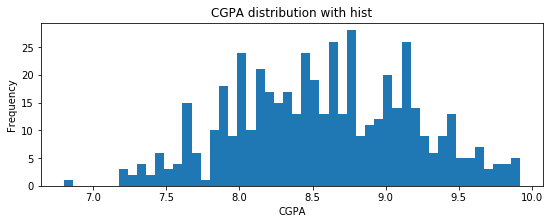

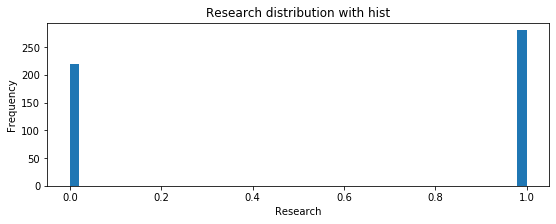

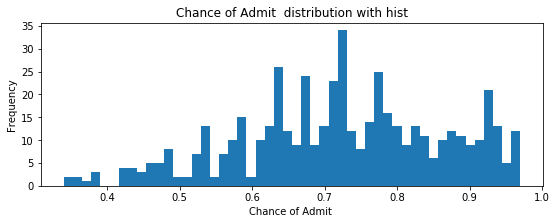

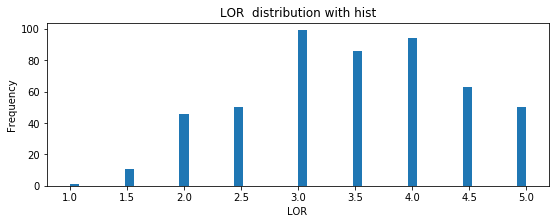

In [103]:
numericVar = ["CGPA","Research","Chance of Admit ","LOR "]
for n in numericVar:
    plot_hist(n)

In [104]:
def bar_plot(variable):
    #get feature
    var = data[variable]
    #count number of categorical variable(value/sample)
    varValue = var.value_counts()
   
    #visualize
    plt.figure(figsize = (9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable, varValue))

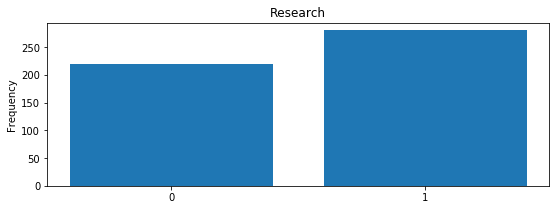

Research: 
 1    280
0    220
Name: Research, dtype: int64


In [105]:
category1 = ["Research"]
for c in category1:
    bar_plot(c)

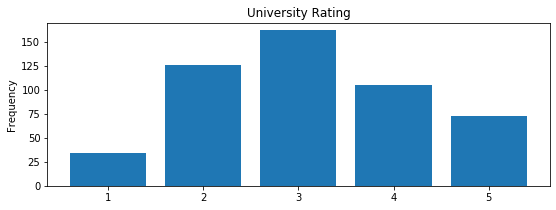

University Rating: 
 3    162
2    126
4    105
5     73
1     34
Name: University Rating, dtype: int64


In [106]:
category1 = ["University Rating"]
for c in category1:
    bar_plot(c)

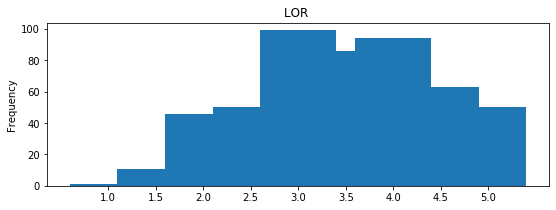

LOR : 
 3.0    99
4.0    94
3.5    86
4.5    63
5.0    50
2.5    50
2.0    46
1.5    11
1.0     1
Name: LOR , dtype: int64


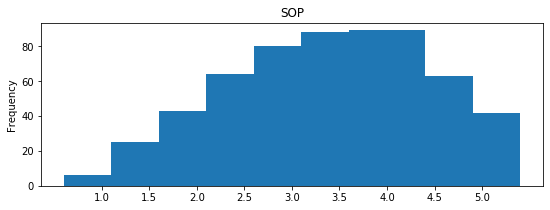

SOP: 
 4.0    89
3.5    88
3.0    80
2.5    64
4.5    63
2.0    43
5.0    42
1.5    25
1.0     6
Name: SOP, dtype: int64


In [107]:
category1 = ["LOR ","SOP"]
for c in category1:
    bar_plot(c)

In [108]:
data=data.rename(columns={'LOR ':'LOR'})
data=data.rename(columns={'Chance of Admit ':'Chance_of_Admit'})

In [109]:
data=data.rename(columns={'University Rating':'University_Rating'})
data.columns

Index(['GRE Score', 'TOEFL Score', 'University_Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance_of_Admit'],
      dtype='object')

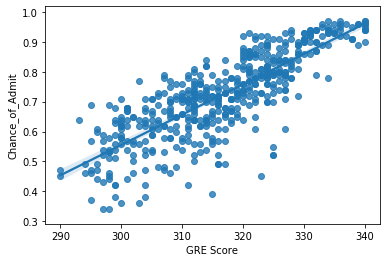

In [110]:
sns.regplot(x='GRE Score',y='Chance_of_Admit',data=data)

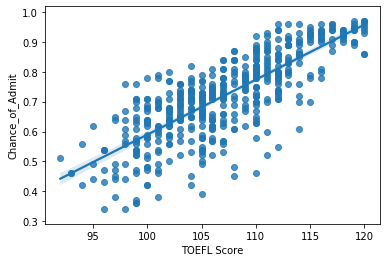

In [111]:
 sns.regplot(x='TOEFL Score',y='Chance_of_Admit',data=data)

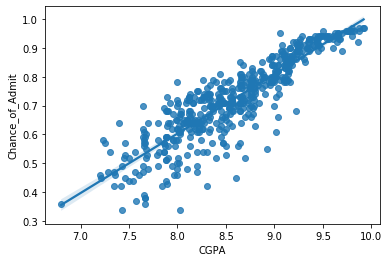

In [112]:
sns.regplot(x='CGPA',y='Chance_of_Admit',data=data)

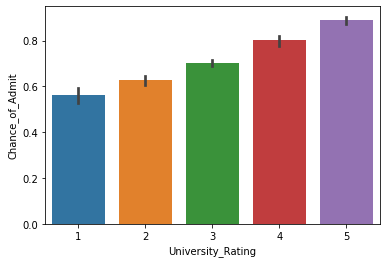

In [113]:
sns.barplot(x='University_Rating',y='Chance_of_Admit',data=data)

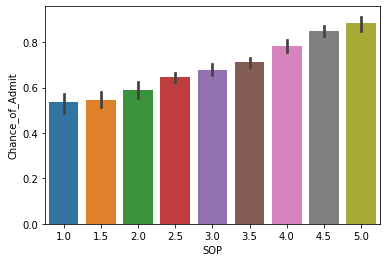

In [114]:
sns.barplot(x='SOP',y='Chance_of_Admit',data=data)

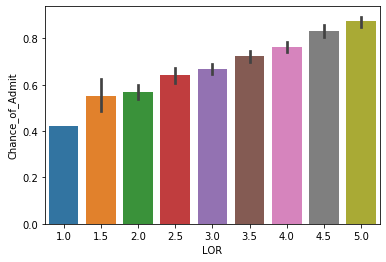

In [115]:
sns.barplot(x='LOR',y='Chance_of_Admit',data=data)

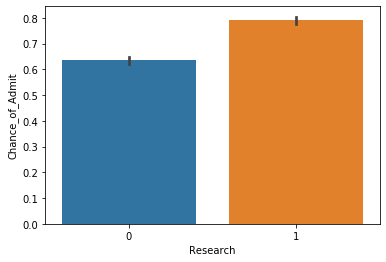

In [116]:
sns.barplot(x='Research',y='Chance_of_Admit',data=data)

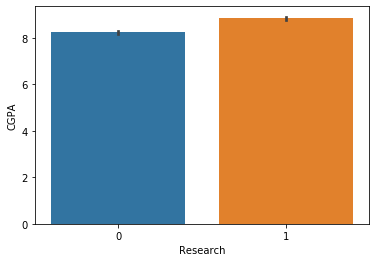

In [117]:
sns.barplot(x='Research',y='CGPA',data=data)

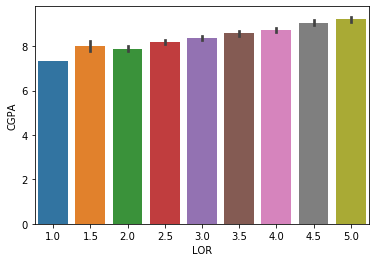

In [118]:
sns.barplot(x='LOR',y='CGPA',data=data)

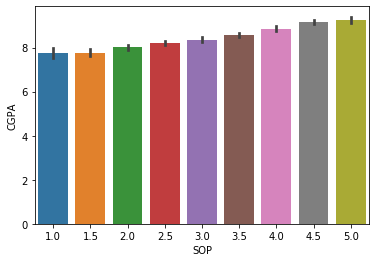

In [119]:
sns.barplot(x='SOP',y='CGPA',data=data)

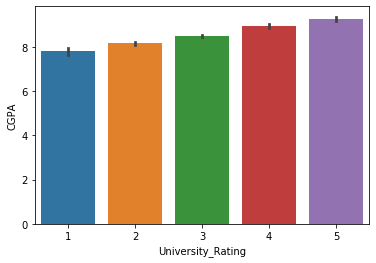

In [120]:
sns.barplot(x='University_Rating',y='CGPA',data=data)

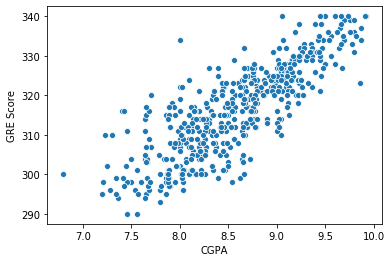

In [121]:
sns.scatterplot(y='GRE Score',x='CGPA',data=data)

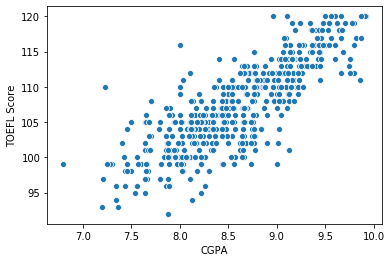

In [122]:
sns.scatterplot(y='TOEFL Score',x='CGPA',data=data)

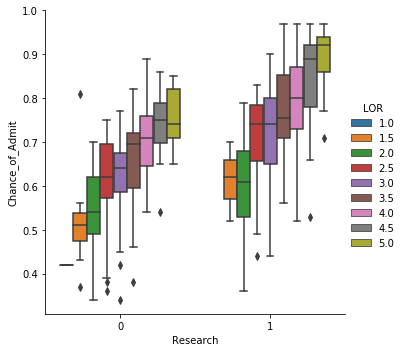

In [123]:
sns.factorplot(x="Research", y="Chance_of_Admit", hue="LOR", data=data, kind="box")
plt.show()

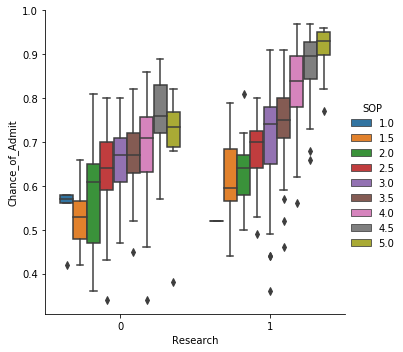

In [124]:
sns.factorplot(x="Research", y="Chance_of_Admit", hue="SOP", data=data, kind="box")
plt.show()

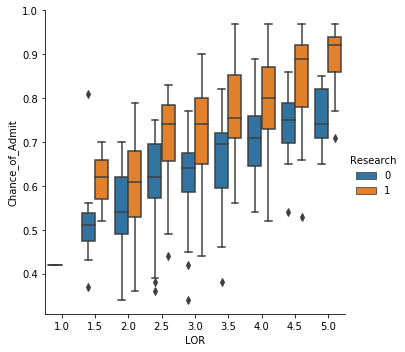

In [125]:
sns.factorplot(x="LOR", y="Chance_of_Admit", hue="Research", data=data, kind="box")
plt.show()

In [126]:
import plotly.express as px

In [127]:
px.strip(data, x="CGPA", y="Research", orientation="h", color="University_Rating")

In [128]:
px.strip(data, x="CGPA", y="Research", orientation="h", color="LOR")

In [129]:
px.strip(data, x="CGPA", y="Research", orientation="h", color="SOP")

In [130]:
px.strip(data, x="Chance_of_Admit", y="Research", orientation="h", color="LOR")

In [131]:
px.strip(data, x="Chance_of_Admit", y="Research", orientation="h", color="SOP")

In [132]:
px.strip(data, x="Chance_of_Admit", y="Research", orientation="h", color="University_Rating")

In [133]:
px.strip(data, x="GRE Score", y="Research", orientation="h", color="LOR")

In [134]:
px.strip(data, x="GRE Score", y="Research", orientation="h", color="SOP")

In [135]:
px.strip(data, x="GRE Score", y="Research", orientation="h", color="University_Rating")

 GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit   

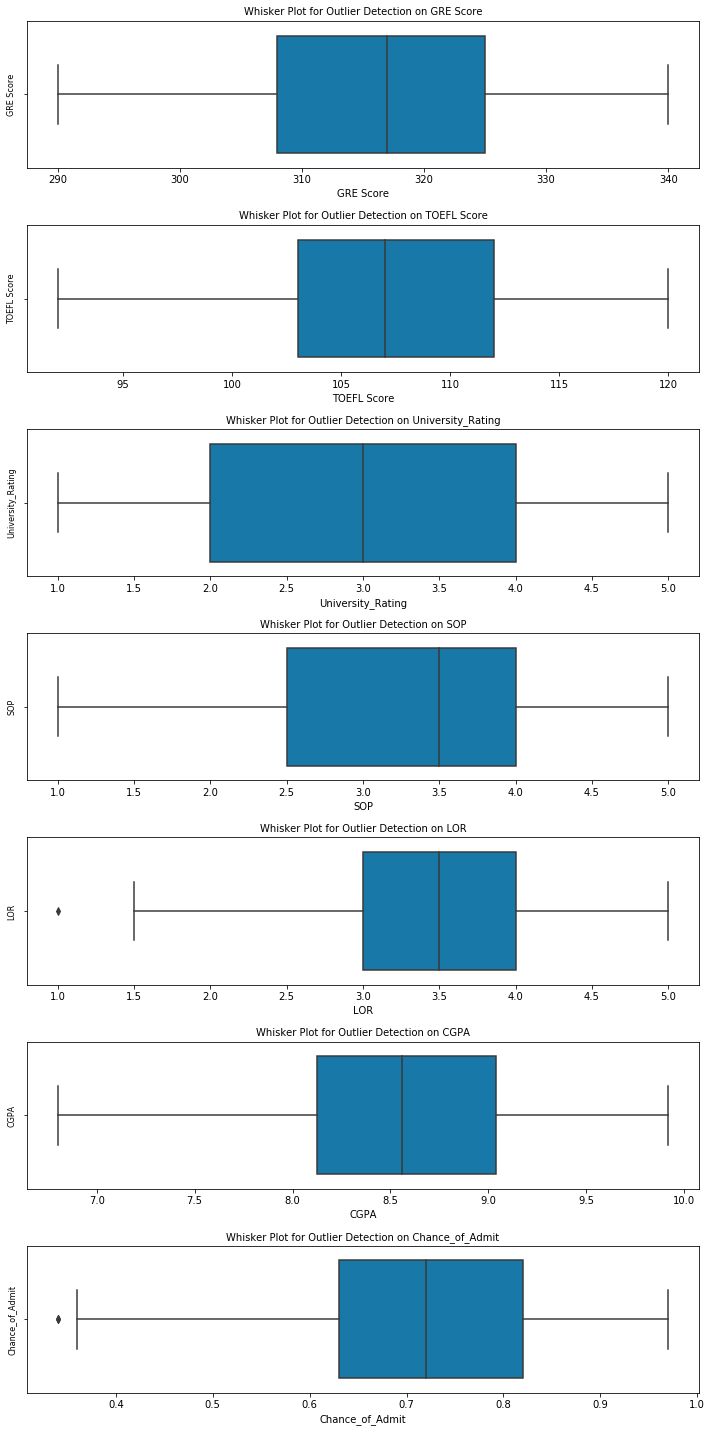

In [136]:
Column_List = ['GRE Score','TOEFL Score','University_Rating','SOP','LOR','CGPA','Chance_of_Admit']
fig, ax = plt.subplots (len(Column_List), figsize = (10, 20))

for i, col_list in enumerate(Column_List):
    sns.boxplot(data[col_list], ax = ax[i], palette = "winter", orient = 'h')
    ax[i].set_title("Whisker Plot for Outlier Detection on" + " " + col_list, fontsize = 10)
    ax[i].set_ylabel(col_list, fontsize = 8)
    fig.tight_layout(pad = 1.1)

In [137]:
def outlier(data):
    out1=[]
    for col in data.columns:
        outliers =[]
        mean = data[col].mean()
        std = data[col].std()
        for i in data[col]:
                z = (i - mean)/std
                if z>2:
                    outliers.append(i)
        out1.append(list(outliers))
        print("There are {} outliers in {} feature".format(len(outliers),col))
    return out1

In [138]:
out = outlier(data)

There are 9 outliers in GRE Score feature
There are 9 outliers in TOEFL Score feature
There are 0 outliers in University_Rating feature
There are 0 outliers in SOP feature
There are 0 outliers in LOR feature
There are 9 outliers in CGPA feature
There are 0 outliers in Research feature
There are 0 outliers in Chance_of_Admit feature


In [154]:
X = data[['GRE Score','TOEFL Score','University_Rating','CGPA','Research','LOR','SOP']]
y = data['Chance_of_Admit']

In [155]:
from sklearn.preprocessing import StandardScaler as SS
ss = SS()
X_ss = ss.fit_transform(X)

In [156]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2,random_state =0)


In [157]:
models={'Linear Regression':LR(),'Decision Tree Regression':DTR(),'Random Forest Regression':RFR(),'Gradient Boosting Regression':GBR(),'Ada Boosting Regression':ABR(),'K-Neighbors Regression':KNR(),'Support Vector Regression':SVR(),'Ridge Regression':RR()}
pred =[]
print(models.keys())

dict_keys(['Linear Regression', 'Decision Tree Regression', 'Random Forest Regression', 'Gradient Boosting Regression', 'Ada Boosting Regression', 'K-Neighbors Regression', 'Support Vector Regression', 'Ridge Regression'])


In [158]:
from sklearn.metrics import r2_score
for name,algo in models.items():
    model=algo
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    acc=r2_score(y_test, predictions)
    pred.append(acc)
    print(name,acc)

Linear Regression 0.7664048993199384
Decision Tree Regression 0.6136217237578554
Random Forest Regression 0.7609401394236969
Gradient Boosting Regression 0.7545550747295164
Ada Boosting Regression 0.7015502826568538
K-Neighbors Regression 0.7114416181164918
Support Vector Regression 0.6370912075759992
Ridge Regression 0.765861819264324


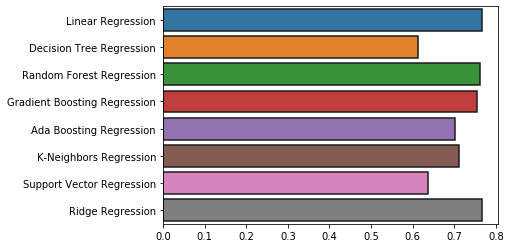

In [159]:
sns.barplot(y=list(models.keys()),x=pred,linewidth=1.5,orient ='h',edgecolor="0.1")

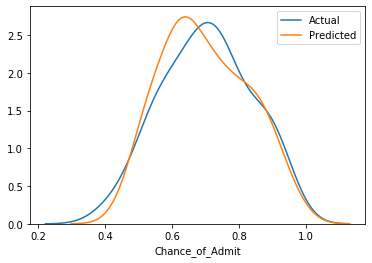

In [160]:
final = LR()
final.fit(X_train,y_train)
final_pred = final.predict(X_test)
sns.distplot(y_test,hist = False,label ='Actual')
sns.distplot(final_pred,hist = False, label ='Predicted')

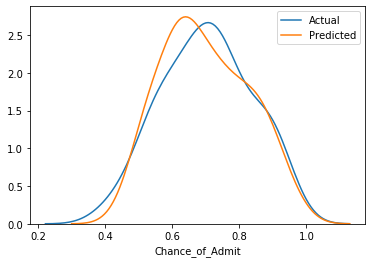

In [161]:
final = RR()
final.fit(X_train,y_train)
final_pred = final.predict(X_test)
sns.distplot(y_test,hist = False,label ='Actual')
sns.distplot(final_pred,hist = False, label ='Predicted')

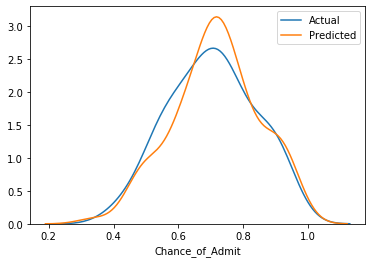

In [162]:
final = DTR()
final.fit(X_train,y_train)
final_pred = final.predict(X_test)
sns.distplot(y_test,hist = False,label ='Actual')
sns.distplot(final_pred,hist = False, label ='Predicted')

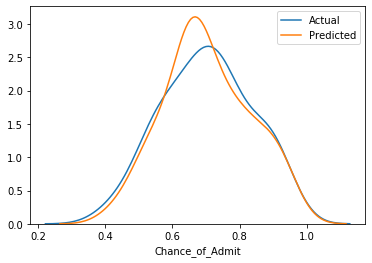

In [163]:
final = RFR()
final.fit(X_train,y_train)
final_pred = final.predict(X_test)
sns.distplot(y_test,hist = False,label ='Actual')
sns.distplot(final_pred,hist = False, label ='Predicted')

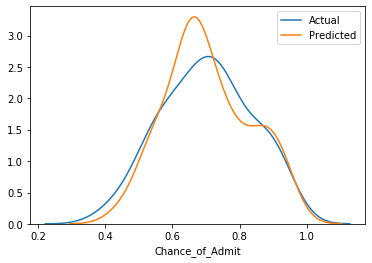

In [164]:
final = GBR()
final.fit(X_train,y_train)
final_pred = final.predict(X_test)
sns.distplot(y_test,hist = False,label ='Actual')
sns.distplot(final_pred,hist = False, label ='Predicted')

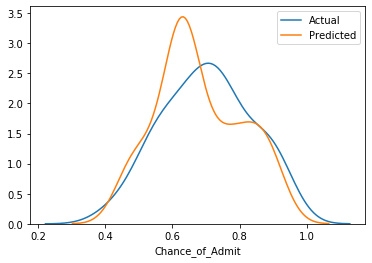

In [165]:
final = ABR()
final.fit(X_train,y_train)
final_pred = final.predict(X_test)
sns.distplot(y_test,hist = False,label ='Actual')
sns.distplot(final_pred,hist = False, label ='Predicted')

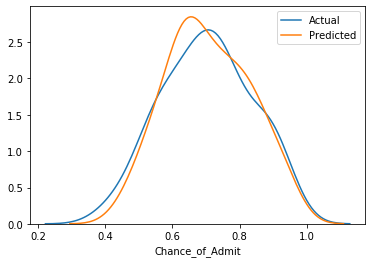

In [166]:
final = KNR()
final.fit(X_train,y_train)
final_pred = final.predict(X_test)
sns.distplot(y_test,hist = False,label ='Actual')
sns.distplot(final_pred,hist = False, label ='Predicted')

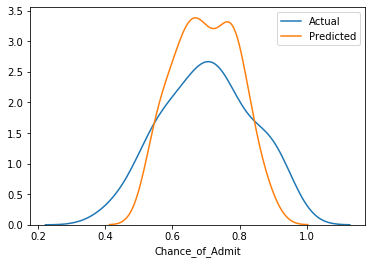

In [167]:
final = SVR()
final.fit(X_train,y_train)
final_pred = final.predict(X_test)
sns.distplot(y_test,hist = False,label ='Actual')
sns.distplot(final_pred,hist = False, label ='Predicted')